In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv("pulsar_data_train.csv")
train_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


### EDA

In [3]:
train_data.shape

(12528, 9)

In [4]:
train_data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
train_data.columns = ["IP Mean", "IP STD", "IP Kurtosis", "IP Skewness", 
                   "DMSNR Mean", "DMSNR STD", "DMSNR Kurtosis", "DMSNR Skewness", "Class"]
train_data.head()

,IP Mean,IP STD,IP Kurtosis,IP Skewness,DMSNR Mean,DMSNR STD,DMSNR Kurtosis,DMSNR Skewness,Class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
for i in train_data.columns:
    train_data[i].fillna(train_data[i].mean(),inplace=True)
    
train_data.isnull().sum()

IP Mean           0
IP STD            0
IP Kurtosis       0
IP Skewness       0
DMSNR Mean        0
DMSNR STD         0
DMSNR Kurtosis    0
DMSNR Skewness    0
Class             0
dtype: int64

In [7]:
train_data.isnull().sum()

IP Mean           0
IP STD            0
IP Kurtosis       0
IP Skewness       0
DMSNR Mean        0
DMSNR STD         0
DMSNR Kurtosis    0
DMSNR Skewness    0
Class             0
dtype: int64

In [8]:
train_data.value_counts("Class")

Class
0.0    11375
1.0     1153
dtype: int64

In [9]:
# Target Class distribution
train_data['Class'].value_counts()/(len(train_data))

0.0    0.907966
1.0    0.092034
Name: Class, dtype: float64

In [36]:
cols = list(train_data.columns)
cols.pop()
cols

['IP Mean',
 'IP STD',
 'IP Kurtosis',
 'IP Skewness',
 'DMSNR Mean',
 'DMSNR STD',
 'DMSNR Kurtosis',
 'DMSNR Skewness']

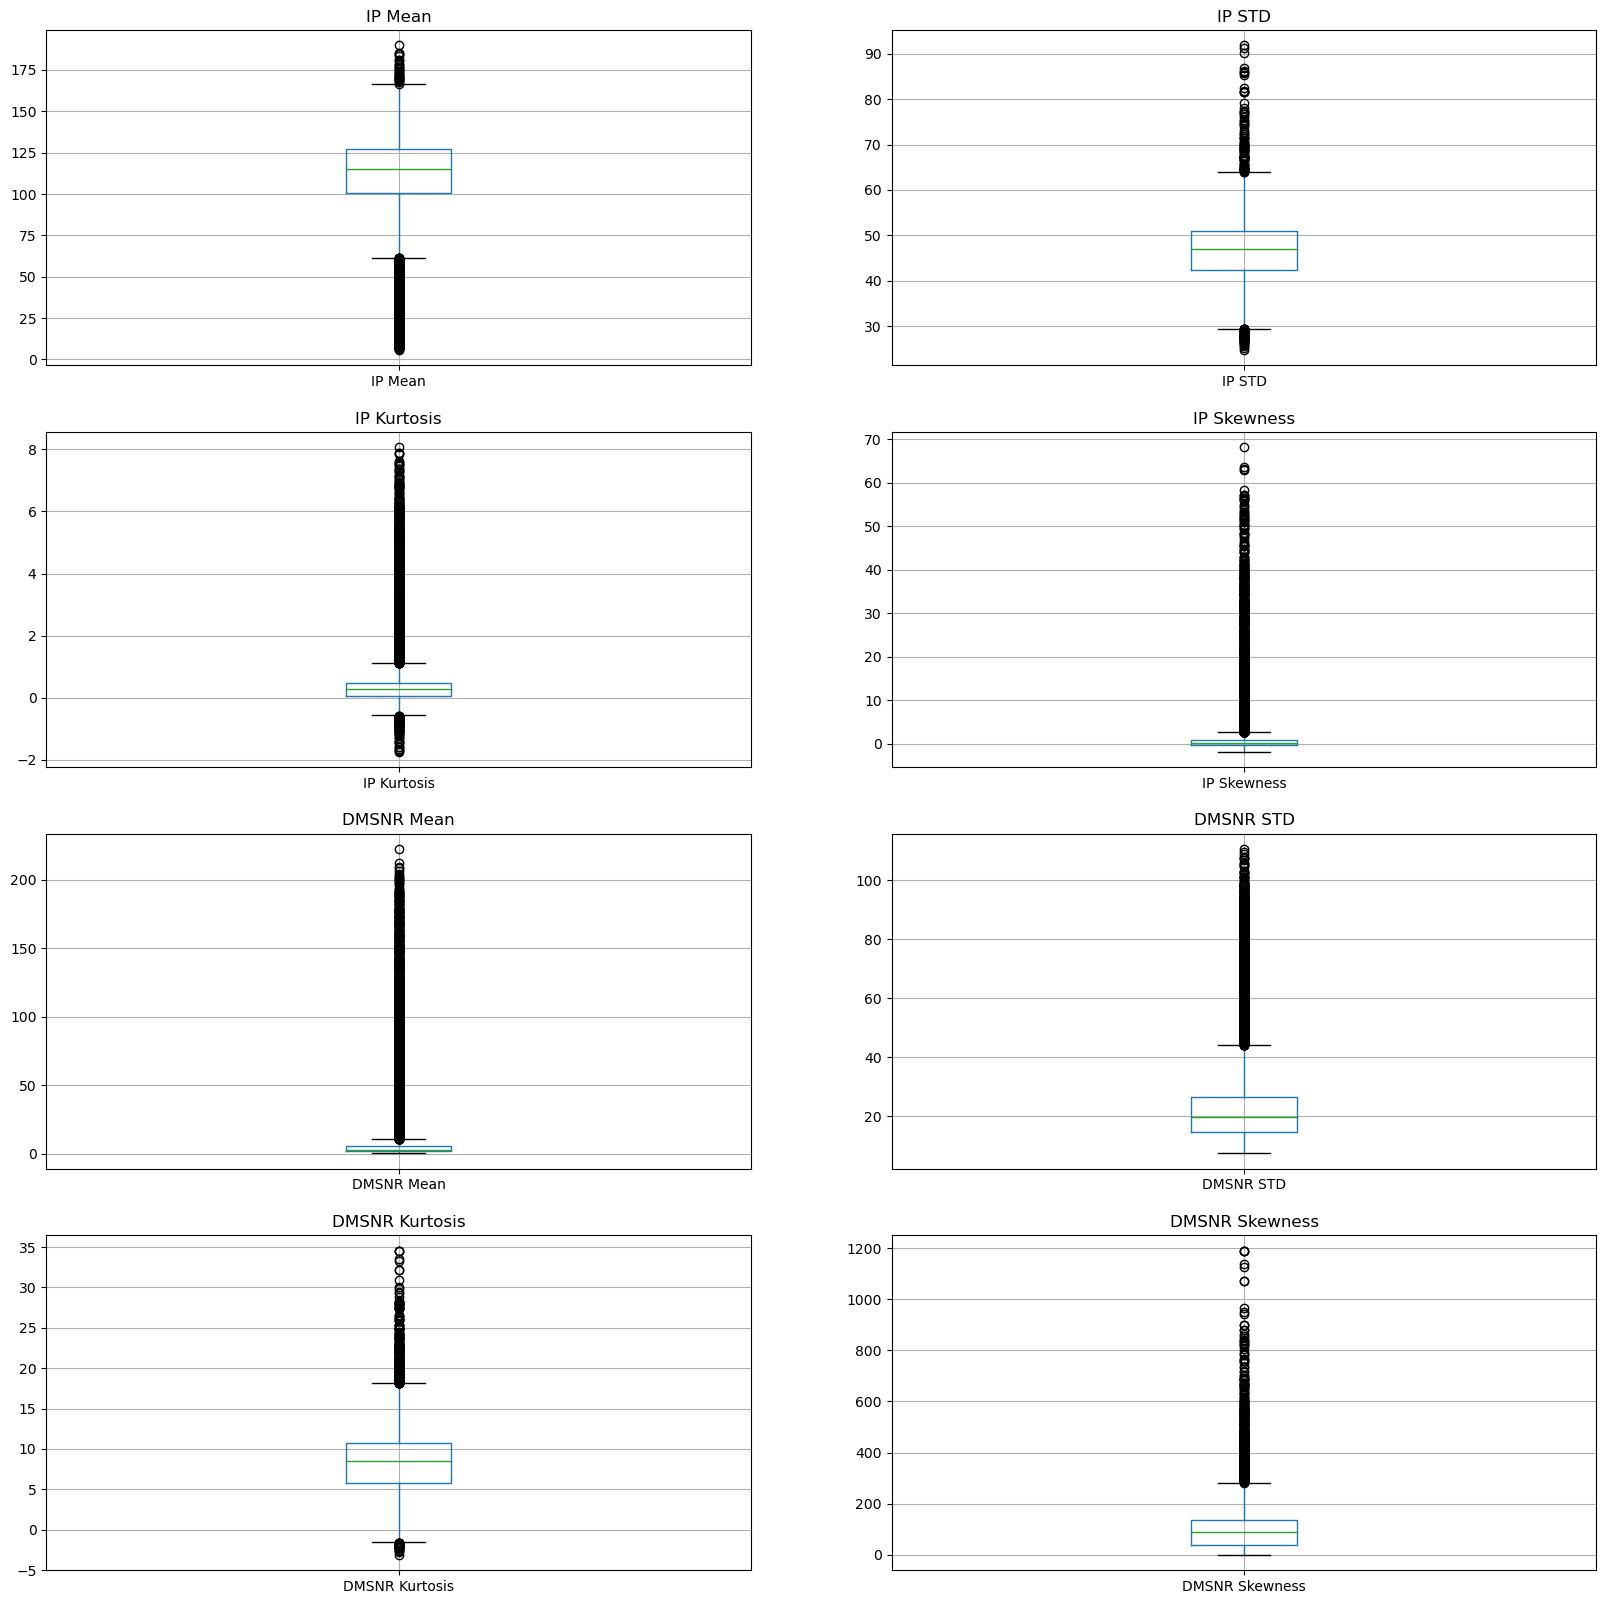

In [38]:
# Outliers 
plt.figure(figsize=(20,20))

for i, col in enumerate(cols):
    plt.subplot(4,2,i+1)
    train_data.boxplot(column =col)
    plt.title(col)
plt.show()

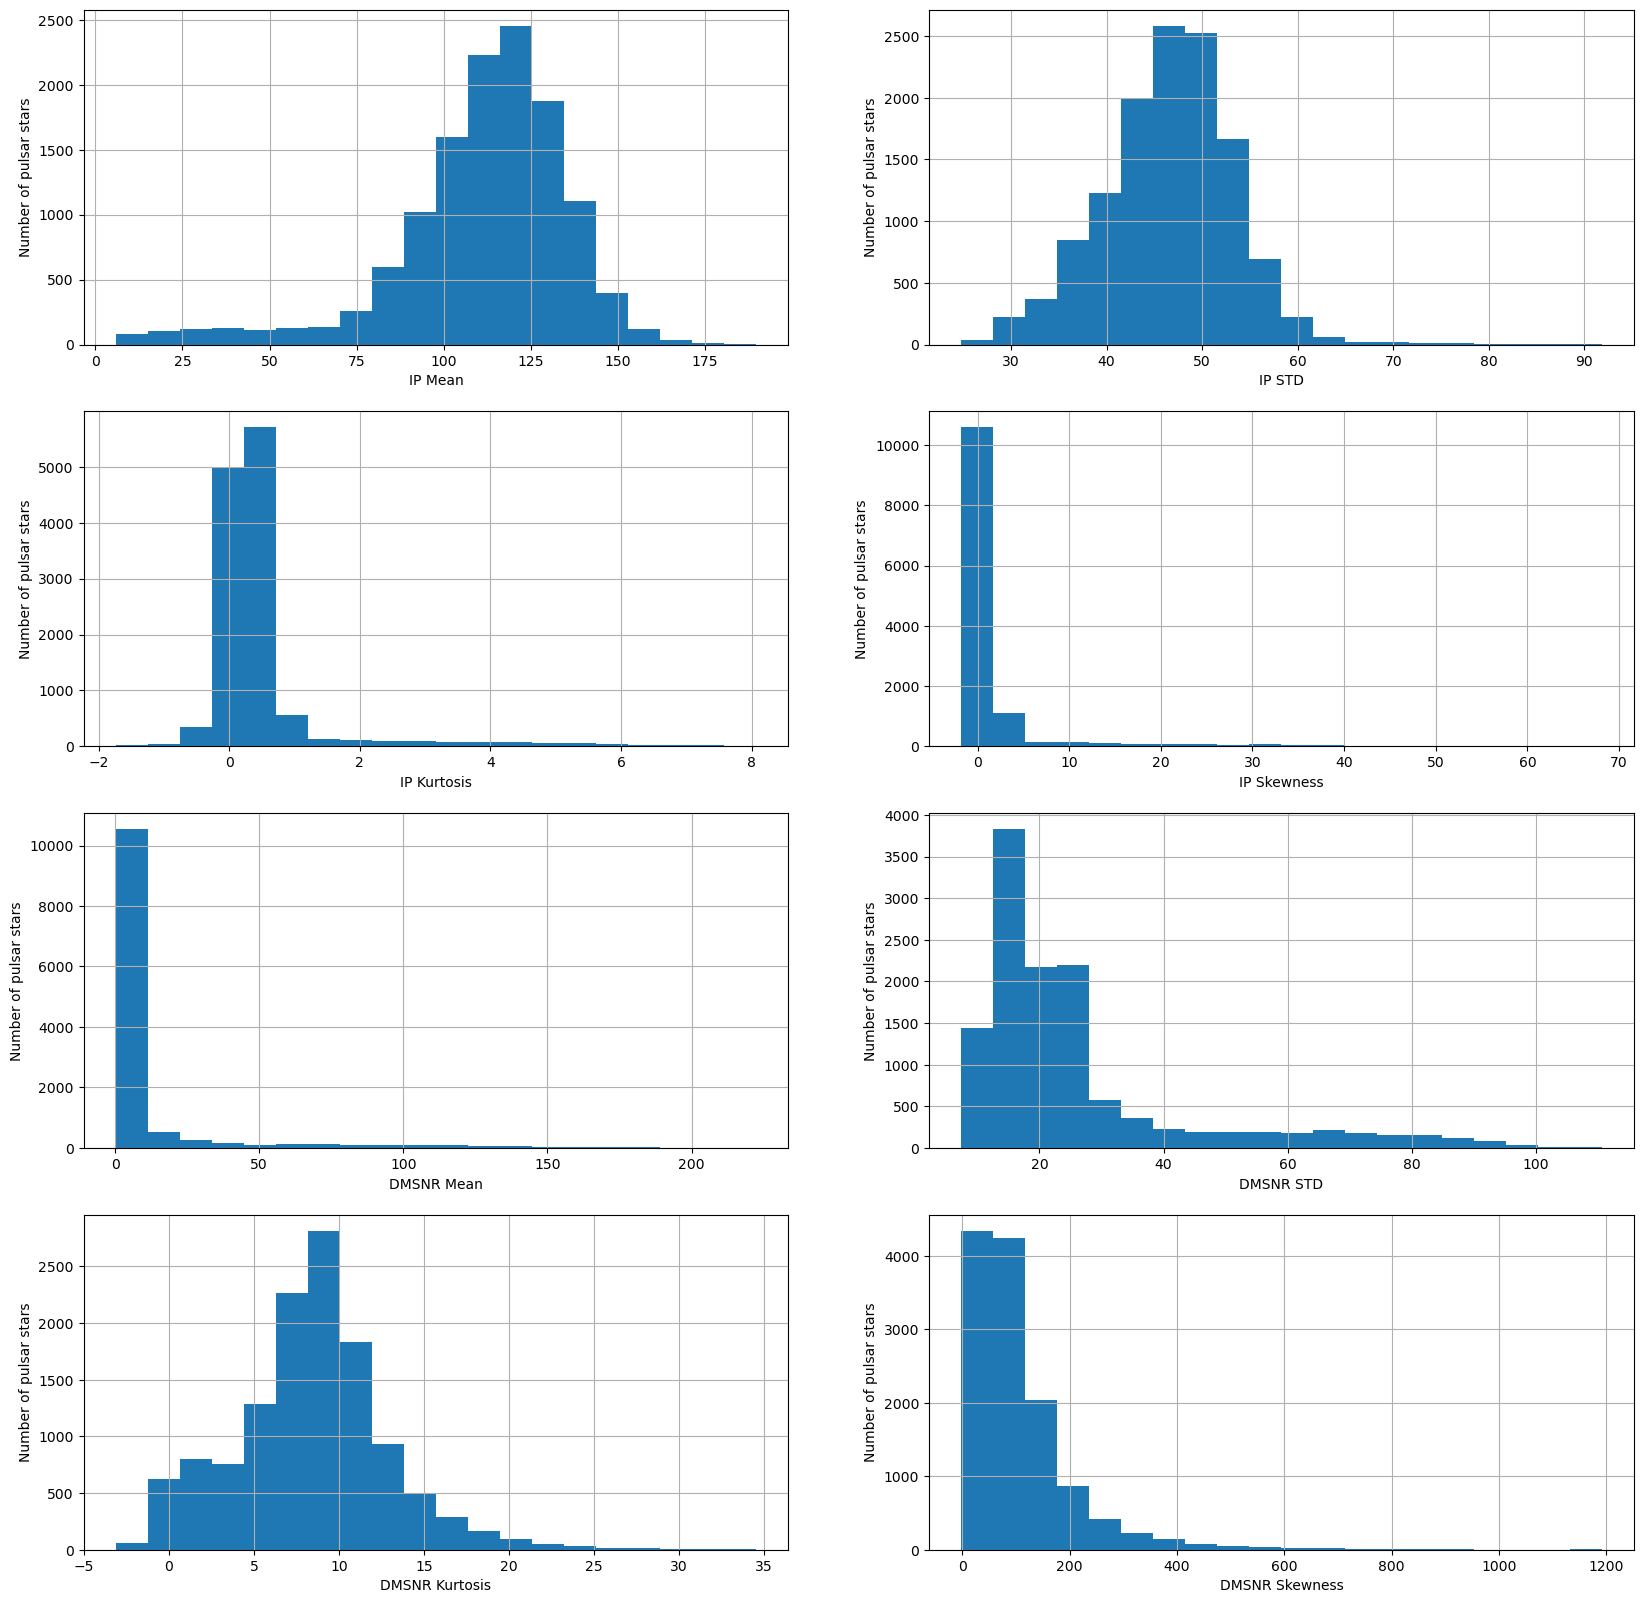

In [39]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    fig = train_data[col].hist(bins=20)
    fig.set_xlabel(col)
    fig.set_ylabel('Number of pulsar stars')
plt.show()

###  Split data into separate training and test set

In [12]:
# Feature Matrix
X = train_data.drop(['Class'], axis=1)
X

,IP Mean,IP STD,IP Kurtosis,IP Skewness,DMSNR Mean,DMSNR STD,DMSNR Kurtosis,DMSNR Skewness
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.351318,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12524,115.617188,46.784600,0.218177,0.226757,6.140468,26.351318,5.732201,34.357283
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [13]:
# Target Variables
Y = train_data['Class']
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12523    0.0
12524    0.0
12525    0.0
12526    0.0
12527    0.0
Name: Class, Length: 12528, dtype: float64

In [14]:
# Split X and Y into training and test sets
# test_size : 20% of the data will be used for testing, and the remaining 80% will be used for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
# X_train and Y_train contains feature matrix and target variables for training
print(X_train.shape)
print(Y_train.shape)

(10022, 8)
(10022,)


In [16]:
# X_test and Y_test contains feature matrix and target variables for testing
print(X_test.shape)
print(Y_test.shape)

(2506, 8)
(2506,)


In [17]:
X_train.isnull().sum()

IP Mean           0
IP STD            0
IP Kurtosis       0
IP Skewness       0
DMSNR Mean        0
DMSNR STD         0
DMSNR Kurtosis    0
DMSNR Skewness    0
dtype: int64

In [18]:
cols = X_train.columns

### Feature Scaling
Feature scaling is beneficial for many machine learning algorithms because it ensures that all features have the same scale. This can be important for algorithms that are sensitive to the scale of the input features, such as gradient descent-based optimization algorithms, k-nearest neighbors, and SVM.

In [19]:
scaler = StandardScaler()

# The fit_transform method calculates the mean and standard deviation of
# each feature in the training set and scales the features accordingly.
X_train = scaler.fit_transform(X_train)

# should not fit the scaler on the test set, as this could introduce data leakage. 
X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### SVM with linear kernal

In [21]:
svc = SVC(kernel='linear', C=1000) # Linear kernel

# the fit method is used to train the 
# machine learning model on the provided training data.
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)

In [22]:
print('Model accuracy score with linear kernel: {0:0.4f}'.
      format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with linear kernel: 0.9781


#### Check for overfitting or underfitting

In [23]:
print('Training set score: {:.4f}'.format(svc.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, Y_test)))

Training set score: 0.9757
Test set score: 0.9781


In [24]:
Y_test.value_counts()

0.0    2285
1.0     221
Name: Class, dtype: int64

In [25]:
null_accuracy = (1684/(1684+171))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9078


### Testing data

In [26]:
test_data = pd.read_csv("pulsar_data_test.csv")
test_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [27]:
for i in test_data.columns:
    test_data[i].fillna(test_data[i].mean(),inplace=True)
    
test_data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile          0
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve             0
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                       0
target_class                                     5370
dtype: int64

In [28]:
target = test_data["target_class"]
features = test_data.drop("target_class", axis=1)

In [29]:
predicted = svc.predict(features)
predicted

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
test_data["target_class"] = predicted
test_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,1.0
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,1.0
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,1.0
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,1.0
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,1.0
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,1.0
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,1.0
5367,136.171875,48.924385,0.483676,0.063227,2.810201,18.695230,7.848577,69.388978,1.0
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,1.0


In [31]:
test_data.value_counts("target_class")

target_class
1.0    5164
0.0     206
dtype: int64

In [32]:
test_data.to_csv("predicted.csv")